In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/car_details.csv")
print(df.head())
df.describe()

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df2 = df.copy()
df2.drop('name', inplace=True, axis=1)
# print(df2.head())

df2['year'] = Le.fit_transform(df2['year'])
df2['fuel'] = Le.fit_transform(df2['fuel'])
df2['seller_type'] = Le.fit_transform(df2['seller_type'])
df2['transmission'] = Le.fit_transform(df2['transmission'])
df2['owner'] = Le.fit_transform(df2['owner'])

In [ ]:
df2.head(6)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,13,60000,70000,4,1,1,0
1,13,135000,50000,4,1,1,0
2,18,600000,100000,1,1,1,0
3,23,250000,46000,4,1,1,0
4,20,450000,141000,1,1,1,2
5,13,140000,125000,4,1,1,0


In [ ]:
#split dataset in features and target variable
feature_cols = ['fuel', 'seller_type','owner']
X = df2[feature_cols] # Features
y = df2.transmission # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

from sklearn.metrics import classification_report
target_names = ['Manual', 'Automatic']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      Manual       0.00      0.00      0.00        97
   Automatic       0.91      1.00      0.95       988

    accuracy                           0.91      1085
   macro avg       0.46      0.50      0.48      1085
weighted avg       0.83      0.91      0.87      1085



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


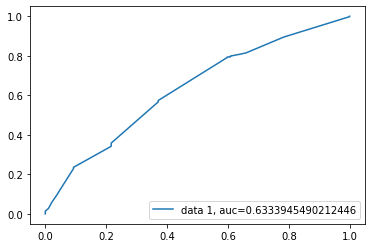

In [ ]:
import matplotlib.pyplot as plt

#ROC Curve
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false
#positive rate. It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()